## Logistic Regression

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

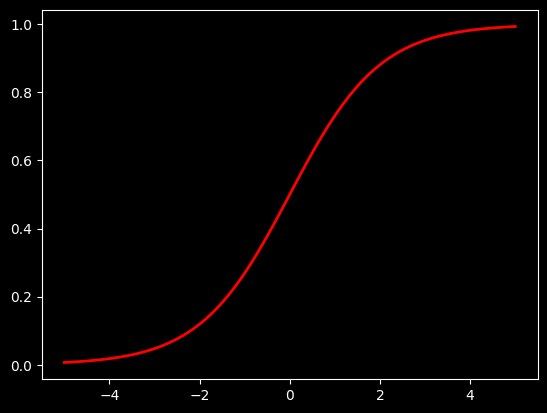

In [50]:
x = np.linspace(-5, 5, 100)

y = 1 / (1 + np.exp(-x))

plt.plot(x, y, color = 'red', linewidth = 2)
plt.style.use("dark_background")

plt.show()

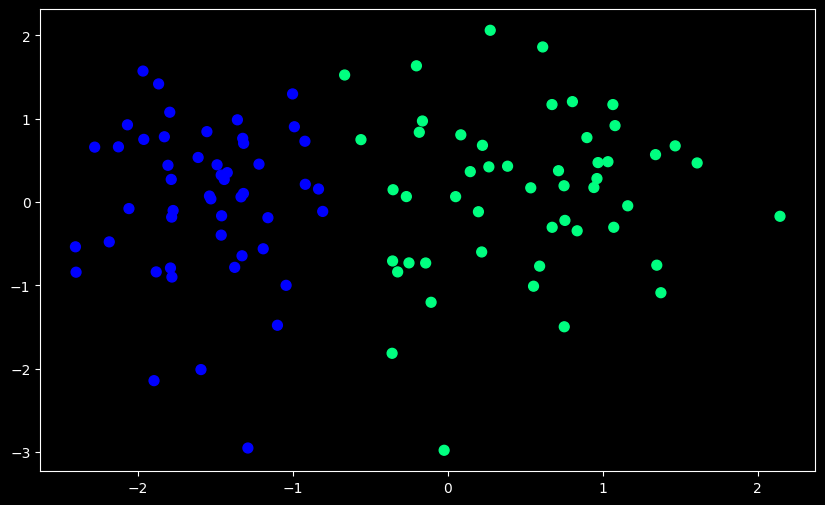

In [51]:
# Create a dataset for the example
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

plt.style.use("dark_background")

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)

In [52]:
# Using the perceptorn Trick 
def step (z):
    return 1 if z > 0 else 0

def perceptron(x, y):
    x = np.insert(x, 0, 1, axis = 1)
    weights = np.ones(x.shape[1])
    index = np.random.randint(0, x.shape[0])
    
    for i in range (1000):
        y_pred = step(np.dot(x[index], weights))
        weights = weights + 0.01 * (y[index] - y_pred) * x[index]
        
    return weights[0], weights[1:]
        

In [53]:
intercept, weights = perceptron(X, y)

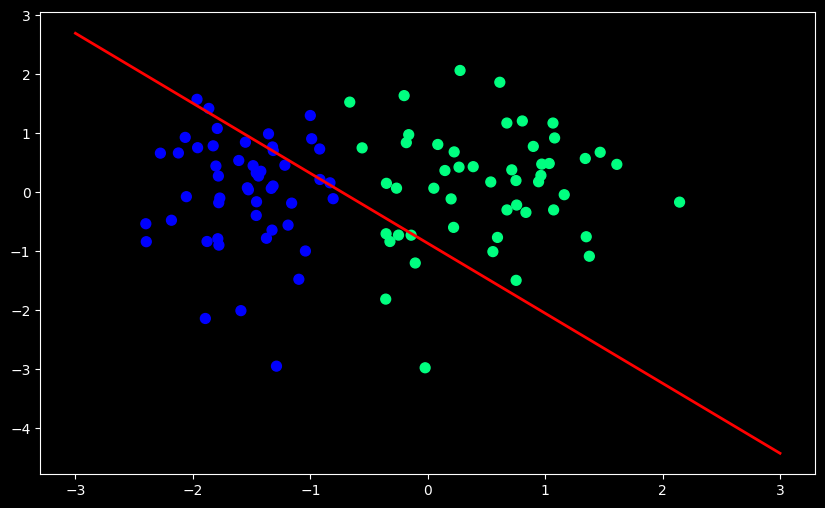

In [54]:
# Plotting the line
m = -weights[0] / weights[1]
b = -intercept / weights[1]

x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

plt.style.use("dark_background")

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)
plt.plot(x_input, y_input, color='red', linewidth=2)
plt.show()

### Will improve the same model through sigmoid function

In [55]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def perception_sig(x, y):
    x = np.insert(x, 0, 1, axis=1)
    weights = np.ones(x.shape[1])
    index = np.random.randint(0, x.shape[0])
    
    for i in range(5000):
        y_pred = sigmoid(np.dot(x[index], weights))
        weights = weights + (0.001 * (y[index] - y_pred) * x[index])
    
    return weights[0], weights[1:]

In [56]:
sig_intercept, sig_weights = perception_sig(X, y)

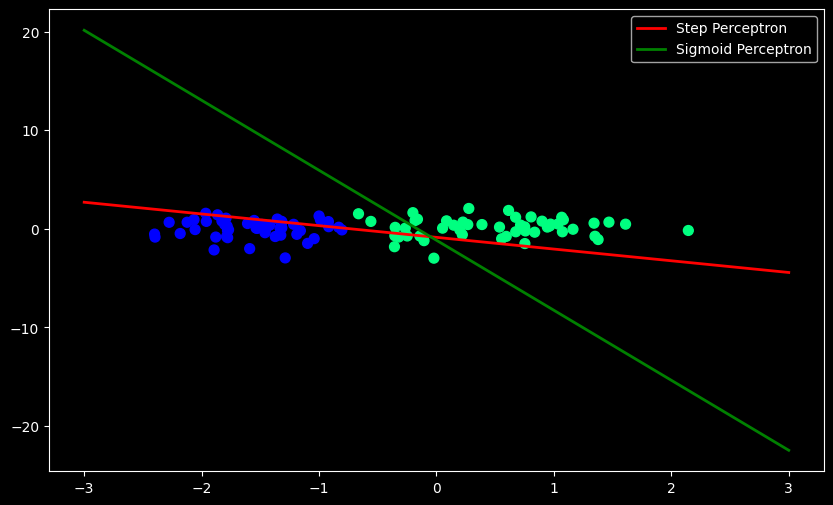

In [57]:
m = -sig_weights[0] / sig_weights[1]
b = -sig_intercept / sig_weights[1]

x_input_sig = np.linspace(-3, 3, 100)
y_input_sig = m * x_input_sig + b

plt.style.use("dark_background")

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)
plt.plot(x_input, y_input, color='red', linewidth=2, label = 'Step Perceptron')
plt.plot(x_input_sig, y_input_sig, color='green', linewidth=2, label = 'Sigmoid Perceptron')

plt.legend()
plt.show()